In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import scipy.stats as stats

In [3]:
# read data into memory
data_set = np.genfromtxt("hw07_data_set.csv", delimiter = ",")
initial_centroids = np.genfromtxt("hw07_initial_centroids.csv", delimiter = ",")

In [19]:
class_means = np.array([[2.5,2.5],[-2.5,2.5],[-2.5,-2.5],[2.5,-2.5],[0,0]])
class_covs = np.array([[[0.8,-0.6],[-0.6,0.8]],[[0.8,0.6],[0.6,0.8]],[[0.8,-0.6],[-0.6,0.8]],[[0.8,0.6],[0.6,0.8]],[[1.6,0],[0,1.6]]])
class_sizes = np.array([50,50,50,50,100])

In [17]:
#define variables
K = 5 #number of clusters
N = len(data_set) #number of data points
D = data_set.shape[1] #number of features

In [5]:
def update_centroids(memberships, X, initial_centroids):
    if memberships is None:
        # initialize centroids
        centroids = initial_centroids
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

Text(0, 0.5, '$x_2$')

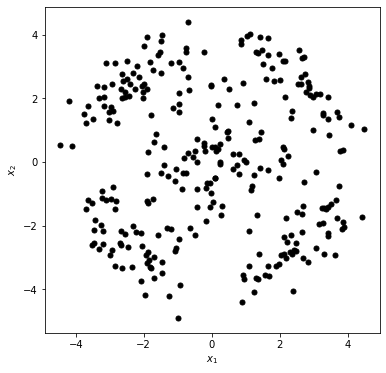

In [6]:
plt.figure(figsize=(6,6))
plt.plot(data_set[:,0], data_set[:,1], ".", markersize = 10, color = "black")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [7]:
centroids = None
memberships = None
while True:

    old_centroids = centroids
    centroids = update_centroids(memberships, data_set, initial_centroids)
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, data_set)
    if np.alltrue(memberships == old_memberships):
        break

In [20]:
sample_means = centroids
class_priors = [class_sizes[c]/K for c in range(K)]

In [35]:
gaussian_density = [stats.multivariate_normal.pdf(data_set, sample_means[c]) for c in range(K)]
h = np.zeros((N, K))

In [84]:
for i in range(100):
    for k in range(K):
        for n in range(N):
            h[n][k] = class_priors[k] * gaussian_density[k][n]
            h[n][k] = h[n][k] / np.sum(h[:,k])

In [85]:
class_priors_2 = [np.sum(h[:,k])/N for k in range(K)]

In [99]:
sample_means_2 = [h[:,k].dot(data_set) / np.sum(h[:,k]) for k in range(K)]

In [101]:
sample_covariances = [h[:,k]* (data_set - sample_means_2[k])* np.tranpose(data_set - sample_means_2[k]))/ np.sum(h[:,k])]

ValueError: operands could not be broadcast together with shapes (5,) (300,2) 

In [102]:
sample_means_2

[array([-2.25815873, -2.39823969]),
 array([2.2689171 , 2.39325799]),
 array([ 2.51421874, -2.39050064]),
 array([0.19033602, 0.00816518]),
 array([-2.16838772,  2.34072491])]